# Logistic Regression#
6 July 2015



##**Predicting a Continuous Response**##

In [1]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass['assorted'] = glass.glass_type.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})

In [2]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1,0


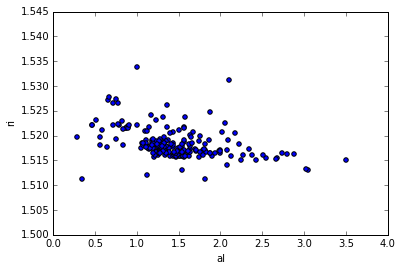

In [4]:
%matplotlib inline
glass.plot(kind = 'scatter', x = 'al', y = 'ri')

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

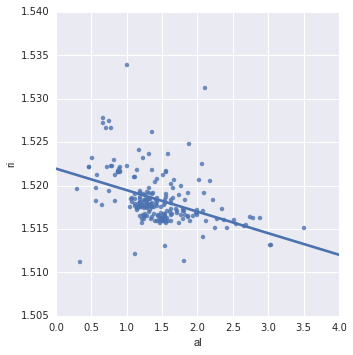

In [6]:
sns.lmplot(x='al', y = 'ri', data = glass, ci = None)

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() 
from sklearn import metrics

feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri

linreg.fit(X, y)

print linreg.intercept_
print linreg.coef_

1.52194533024
[-0.00247761]


How can we add the regression line when using matplotlib instead of seaborn?

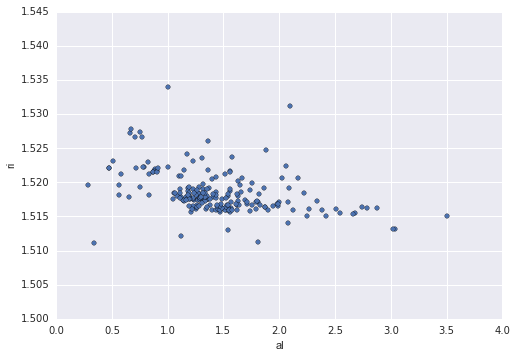

In [14]:
glass.plot(kind = 'scatter', x = 'al', y = 'ri')

Why don't we make predictions for all of our X values and then connect them using a line?

In [18]:
ri_pred = linreg.predict(X)

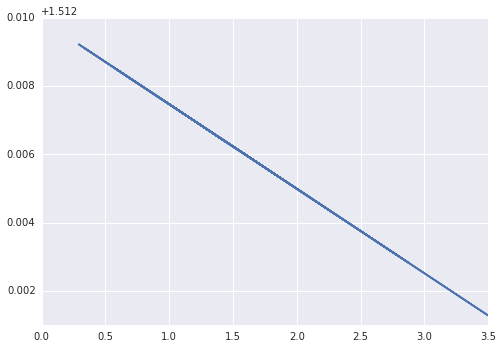

In [19]:
plt.plot(glass.al, ri_pred)

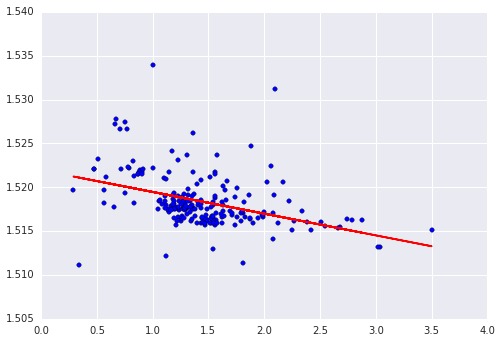

In [20]:
# just have to put them both in the same cell for them to overlay

plt.plot(glass.al, ri_pred, color="red")
plt.scatter(glass.al, glass.ri)

In [21]:
linreg.predict(2)
# same as
linreg.intercept_ + 2*linreg.coef_

array([ 1.51699012])

In [22]:
zip(feature_cols, linreg.coef_)

[('al', -0.0024776063874696243)]

##**Predicting a categorical response**##

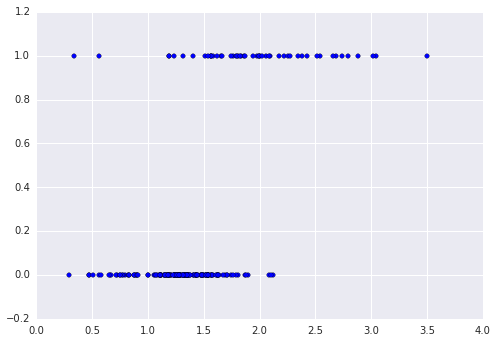

In [23]:
plt.scatter(glass.al, glass.assorted)

In [24]:
feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted

linreg.fit(X, y)

print linreg.intercept_
print linreg.coef_

-0.485836169197
[ 0.501177]


In [25]:
assorted_pred = linreg.predict(X)

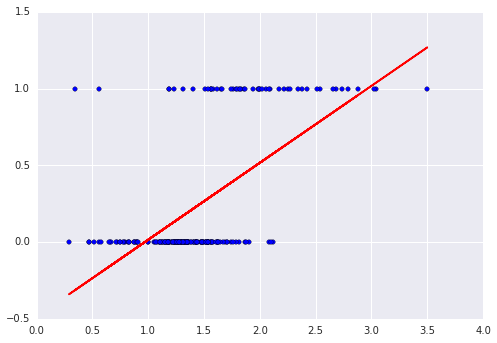

In [27]:
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred, color='red')

It makes sense that for lower values of al we'll predict 0 and higher values we can predict 1, but where is that threshold? 2?

We need to transform our predictions from a continuous value to a discrete value using the cutoff value.

In [28]:
# create an array (looks like a list)
nums = np.array([5, 15, 8])

In [29]:
# .where is an if statement that is applied to the entire array
# very useful!!
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], 
      dtype='|S5')

In [32]:
assorted_pred_class = np.where(assorted_pred > 0.5, 1, 0)
# taking the continuous predictions and turning them into categorical predictions

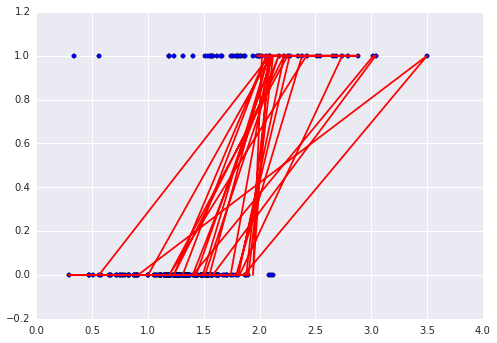

In [33]:
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_class, color='red')

In [34]:
glass['assorted_pred_class'] = assorted_pred_class

In [35]:
glass.sort('al', inplace = True)

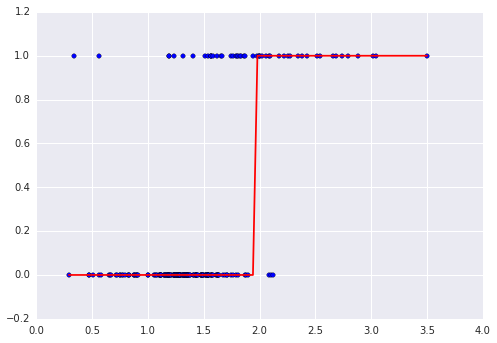

In [37]:
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, glass.assorted_pred_class, color='red')

This is now a map for how we can figure out a good threshold value for classification problems

##**Using Logistic Regression**##

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9) # regularization parameter 

feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted

logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)

In [39]:
assorted_pred_class = logreg.predict(X)

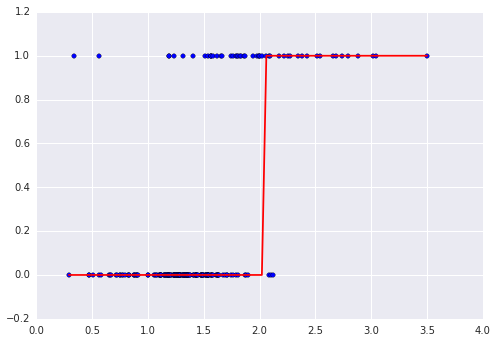

In [40]:
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_class, color = 'red')

Logistic regression is doing something similar to linear regression with a threshold

In [44]:
assorted_pred_prob = logreg.predict_proba(X)[:, 1]

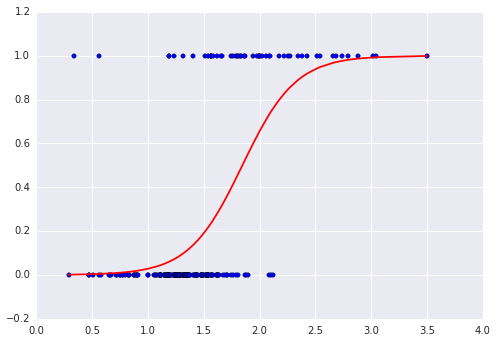

In [45]:
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_prob, color = 'red')

Predictive probability: the probability that y = 1 given x

So we don't necessarily need logistic regression to predict which class, but we need it in order to find the predictive probability.

In [46]:
print logreg.predict_proba(1)
print logreg.predict_proba(2)
print logreg.predict_proba(3)

[[ 0.97161726  0.02838274]]
[[ 0.34361555  0.65638445]]
[[ 0.00794192  0.99205808]]


For x = 1, the predictive probability for class 0 is 0.97 and the predictive probability for class 1 is 0.02 (and so forth). 

```
logreg.predict_proba(X)[:, 1]
# [row, column]
# [take all rows, take the oneth column]
```

One of the drawbacks is that it can't fit nonlinear decisions (i.e. if there are ranges at either end that are more likely to be 0 and in the middle is 1).

##**Probability, odds, e, log**##

In [47]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [48]:
np.exp(1) # e to the 1 power, the base growth rate

2.7182818284590451

In [50]:
np.log(2.718)   # refers to natural log, not a base 10 log
                # how long it takes to achieve that growth rate

0.99989631572895199

In [52]:
# transforming into logodds
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


The log of the odds
- A probability of 50% is odds of 1 with a log odds of 0
- A probability of 90% is odds of 9 with a log odds of 2.19

##**What is Logistic Regression?##

**Linear regression**: continuous response is modeled as a linear combination of the features:

$$y=β0+β1x

Logistic regression: log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

ln(p1−p)=β0+β1x
This is called the logit function.

Probability is sometimes written as pi:

ln(π1−π)=β0+β1x
The equation can be rearranged into the logistic function:

π=eβ0+β1x1+eβ0+β1x

##**Interpreting Logistic Regression Coefficients**##

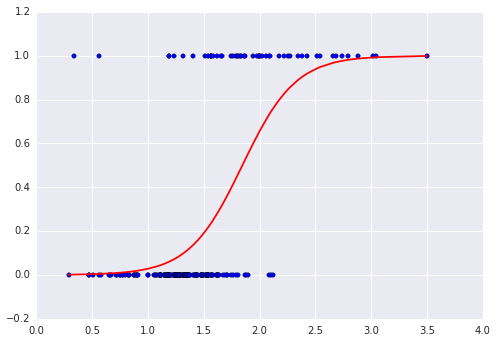

In [53]:
# plot the predicted probabilities again
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_prob, color='red')

In [54]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_ * 2
logodds # not a probability, but a logodds

array([[ 0.64722323]])

In [55]:
# now we convert from log odds to odds
odds = np.exp(logodds)
odds

array([[ 1.91022919]])

In [56]:
# now convert odds to probability
prob = odds / (1 + odds)
prob

array([[ 0.65638445]])

In [58]:
# or..
logreg.predict_proba(2)[:, 1]

array([ 0.65638445])

Positive log-odd coefficients, it is increasing the probability of the response. A negative coefficient is decreasing the probability of the response.

In [59]:
# examine the coefficient for al
zip(feature_cols, logreg.coef_[0])

[('al', 4.1804038614510928)]

A 1 unit increase is associated with a 4.18 unit increase in the log odds of the response

In [60]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.99205808391674566

In [62]:
logreg.predict_proba(3)[:,1]

array([ 0.99205808])

**Bottom line**: Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

##**Comparing Log Regression with other models**##

Advantages:
- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:
- Presume linear relationship btwn features and log-odds of the response
- Performance is (generally) not compoetitive with best supervised learning methods
- Sensitive to irrelevant features
- Can't automatically learn feature interactions